# This is the proof that the original implementation with phi_dot + DGL and the second f(t,y) implementations are both correct 

In [1]:
import time
import numpy as np 




def RK4_a(tinc=0.01, tend=4000):
    
    
    def DGL(phi, phi_dot):
        return -(3/2)*(g/l)*np.sin(phi)
    
    m = 25
    g = 9.81
    l= 1.5
    initial_angle = 90.0

    st = time.time()

    t = np.arange(0, tend, tinc)
    n = len(t) 

    phi=np.zeros(n)
    phi_dot=np.zeros(n)
    phi[0] = np.radians(initial_angle) 
    phi_dot[0] = np.radians(0.0)


    for i in range(0, n-1):
        k1y = tinc * phi_dot[i]
        k1v = tinc * DGL(phi[i], phi_dot[i])

        k2y = tinc * (phi_dot[i] + 0.5 * k1v)
        k2v = tinc * DGL(phi[i] + 0.5 * k1y, phi_dot[i] + 0.5 * k1v)

        k3y = tinc * (phi_dot[i] + 0.5 * k2v)
        k3v = tinc * DGL(phi[i] + 0.5 * k2y, phi_dot[i] + 0.5 * k2v)

        k4y = tinc * (phi_dot[i] + k3v)
        k4v = tinc * DGL(phi[i] + k3y, phi_dot[i] + k3v)

        # Compute next value of y 
        phi_next = phi[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0  
        phi_dot_next = phi_dot[i] + (k1v + 2 * k2v + 2 * k3v + k4v) / 6.0

        phi[i+1] = phi_next
        phi_dot[i+1] = phi_dot_next


    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    return phi #, t
    #print('Execution time:', elapsed_time, 'seconds')


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def RK4_b(tinc=0.01, tend=4000):
    # Constants
    m = 25
    g = 9.81  # m/s^2
    l = 1.5   # length of pendulum in meters

    def f(t, y):
        """
        Defines the system of first-order ODEs for the physical pendulum.
        y[0] = phi, y[1] = omega
        """
        return np.array([y[1], -1.5 * (g / l) * np.sin(y[0])])

    def RK4_step(t, y, h, f):
        """
        Perform a single step of the Runge-Kutta 4th order method.
        """
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        return y + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Initial conditions
    phi0 = np.pi / 2  # initial angle (in radians)
    omega0 = 0.0      # initial angular velocity

    # Time parameters
    t0 = 0.0          # initial time
    tf = tend         # final time
    h = tinc          # step size

    # Number of steps
    num_steps = int((tf - t0) / h)

    # Arrays to store results
    t_values = np.linspace(t0, tf, num_steps)
    phi_values = np.zeros_like(t_values)
    omega_values = np.zeros_like(t_values)

    # Set initial conditions
    phi_values[0] = phi0
    omega_values[0] = omega0

    # Solve using RK4 method
    for i in range(num_steps - 1):
        y = np.array([phi_values[i], omega_values[i]])
        phi_values[i+1], omega_values[i+1] = RK4_step(t_values[i], y, h, f)

    return phi_values#, t_values


In [3]:
import numpy as np

def ARK4(tinc=0.01, tend=4000, alpha=0.05):
    # Constants
    m = 25
    g = 9.81  # m/s^2
    l = 1.5   # length of pendulum in meters

    def f(t, y):
        """
        Defines the system of first-order ODEs for the physical pendulum.
        y[0] = phi, y[1] = omega
        """
        return np.array([y[1], -1.5 * (g / l) * np.sin(y[0])])

    # Initial conditions
    phi0 = np.pi / 2  # initial angle (in radians)
    omega0 = 0.0      # initial angular velocity

    # Time parameters
    t0 = 0.0          # initial time
    tf = tend         # final time
    h = tinc          # step size

    # Number of steps
    num_steps = int((tf - t0) / h)

    # Arrays to store results
    t_values = np.linspace(t0, tf, num_steps)
    phi_values = np.zeros_like(t_values)
    omega_values = np.zeros_like(t_values)

    # Set initial conditions
    phi_values[0] = phi0
    omega_values[0] = omega0

    E_kin_list = np.zeros(num_steps)
    E_pot_list = np.zeros(num_steps)
    E_summe_list = np.zeros(num_steps)

    E_kin_list[0] = (1/6) * m * (l**2) * (omega0**2)
    E_pot_list[0] = -m * g * l * np.cos(phi0) / 2
    E_summe_list[0] = E_kin_list[0] + E_pot_list[0]
    w = 1
    # Solve using RK4 method
    for i in range(num_steps-1):
        t = t_values[i]
        y = np.array([phi_values[i], omega_values[i]])
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        # Compute next value of y
        phi_next = phi_values[i] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
        phi_dot_next = omega_values[i] + (k1[1] + 2*k2[1] + 2*k3[1] + w*k4[1]) / 6

        E_kin_next = (1/6) * m * (l**2) * (phi_dot_next**2)
        E_pot_next = -m * g * l * np.cos(phi_next) / 2
        E_summe_next = E_kin_next + E_pot_next
        
        delta_w = (E_summe_next - E_summe_list[i])
        w -= alpha * delta_w

        # Update phi, phi_dot and energy lists
        phi_values[i+1] = phi_next
        omega_values[i+1] = phi_dot_next
        E_kin_list[i+1] = E_kin_next
        E_pot_list[i+1] = E_pot_next
        E_summe_list[i+1] = E_summe_next

    return phi_values # , t_values


0.0
0.04
0.08
0.12
0.16
0.2
0.24
0.28
0.32
0.36
0.4
0.44
0.48
0.52
0.56
0.6
0.64
0.68
0.72
0.76
0.8
0.84
0.88
0.92
0.96


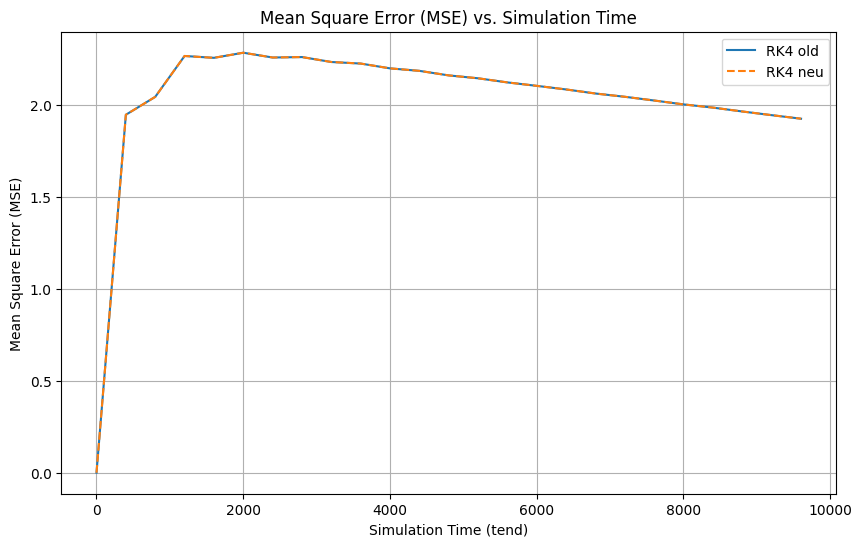

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from rk4_default_solve_ivp import rk4_default_solve_ivp


def calculate_mse(tend):
    tinc = 0.1
    tlist = np.arange(0.0, tend, tinc)

    # Compute solutions using different methods
    rk4a_solution = RK4_a(tinc, tend)
    rk4b_solution = RK4_b(tinc, tend)
    ark4_solution = ARK4(tinc, tend)
    rk4_default_solve_ivp_radau_solution = rk4_default_solve_ivp(tinc, tend, method="Radau")


    # Calculate Mean Square Error (MSE) between Radau and other methods
    mse_radau_rk4a = np.mean((rk4_default_solve_ivp_radau_solution - rk4a_solution) ** 2)
    mse_radau_rk4b = np.mean((rk4_default_solve_ivp_radau_solution - rk4b_solution) ** 2)
    mse_radau_ark4 = np.mean((rk4_default_solve_ivp_radau_solution - ark4_solution) ** 2)


    return mse_radau_rk4a, mse_radau_rk4b, mse_radau_ark4

# Initialize lists to store MSE values and tend values
mse_values_rk4a = []
mse_values_rk4b = []
mse_values_ark4 = []

tend_values = list(range(2, 10000, 400))

# Calculate MSE for different tend values
for index, tend in enumerate(tend_values):
    print(index/(len(tend_values)))
    mse_rk4a, mse_rk4b, mse_ark4 = calculate_mse(tend)
    mse_values_rk4a.append(mse_rk4a)
    mse_values_rk4b.append(mse_rk4b)
    mse_values_ark4.append(mse_ark4)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(tend_values, mse_values_rk4a, label='RK4 old')
plt.plot(tend_values, mse_values_rk4b, label='RK4 neu' , linestyle='dashed')
#plt.plot(tend_values, mse_values_ark4, label='ARK4')


plt.title('Mean Square Error (MSE) vs. Simulation Time')
plt.xlabel('Simulation Time (tend)')
plt.ylabel('Mean Square Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
print("MSE between Radau and RK4a:", mse_values_rk4a[-1])
print("MSE between Radau and RK4b:", mse_values_rk4b[-1])
print("MSE between Radau and ARK4:", mse_values_ark4[-1])


MSE between Radau and RK4a: 0.04046647584688343
MSE between Radau and RK4b: 0.04046647584688343
MSE between Radau and ARK4: 0.04046224714519598
